## Driving Events - Extract and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import datetime 

The experiments were carried out by a single and experienced driver in three trips (i.e., trip #1, #2, #3) of approximately 25, 16, and 27 minutes. 

The driving events were performed using a single vehicle, 2010 Volkswagen Fox 1.0, under conditions of partly cloudy weather, dry track, and regular asphalts. 

The data were sampled with a smartphone model Xiaomi Redmi Note 8 Pro with Android version 10. The smartphone was affixed to the instrument panel of the vehicle in landscape orientation, maintained no movement or operation during the trips. 

We obtained 169 events, subdivided into 26 non-aggressive events, 25 aggressive right-turn events, 23 aggressive left-turn events, 29 aggressive lane change events to the right, 23 aggressive lane change events to the left, 22 aggressive braking events, and 21 aggressive acceleration events. 

The non-aggressive events replicate the events of accelerating, braking, lane changing, and turning; however, with less intensity and greater caution during movements. These events were labeled by the driver, recording the start and end of the events with an audio recorder app running in the background on Android throughout the trip period. With this arrangement, someone listening to the recorded audio later could exactly mark what driving event was conducted and when the event started and ended. 

In [2]:
# Extract raw data from trip #1.
data_acel1 = pd.read_csv('Linear_Acceleration_1.csv')
data_velang1 = pd.read_csv('Gyroscope_1.csv')
data_target1 = pd.read_csv('Labeled_events_1.csv')

# Extract raw data from trip #2.
data_acel2 = pd.read_csv('Linear_Acceleration_2.csv')
data_velang2 = pd.read_csv('Gyroscope_2.csv')
data_target2 = pd.read_csv('Labeled_events_2.csv')

# Extract raw data from trip #3.
data_acel3= pd.read_csv('Linear_Acceleration_3.csv')
data_velang3 = pd.read_csv('Gyroscope_3.csv')
data_target3 = pd.read_csv('Labeled_events_3.csv')

In [3]:
data_target1.head()

start      end                  event  target  timesync  sample
0   34.657   39.616  aggressive right-turn       1    11.123       0
1   83.092   87.225   aggressive left-turn       2    11.123       1
2   99.449  105.010   non-aggressive event       0    11.123       2
3  108.936  111.000     aggressive braking       4    11.123       3
4  286.000  288.534     aggressive braking       4    11.123       4

In [4]:
print(np.where(data_target1['target']==2)) 
print(np.where(data_target2['target']==2))
print(np.where(data_target3['target']==2))

(array([ 1, 12, 13, 17, 18, 31, 32, 33, 34, 38, 42, 47, 48, 54, 63, 64, 70,
       72], dtype=int64),)
(array([ 1,  3, 10, 11, 35], dtype=int64),)
(array([], dtype=int64),)


We obtained 169 events, subdivided into 

- 12, 10, 4 = 26 non-aggressive events,
- 11, 8, 6 = 25 aggressive right-turn events
- 18, 5, 0 = 23 aggressive left-turn events
- 5, 6, 18 = 29 aggressive lane change events to the right
- 15, 7, 0 = 22 aggressive braking events
- 9, 6, 6 = 21 aggressive acceleration events
- 3, 4, 6 = 23 aggressive lane change events to the left

### Extract Events

In [5]:
# Segmentation of the observed events in Linear Acceleration (acc) and Angular Velocity (giro)

# Trip #1 dataset 
length1 = len(data_target1)
acc_eventsgt1 = {}
giro_eventsgt1 = {}

for i in np.arange(length1):
    acc_eventsgt1[i] = pd.DataFrame()
    giro_eventsgt1[i] = pd.DataFrame()
    acc_eventsgt1[i] = acc_eventsgt1[i].append(data_acel1[data_acel1['Time (s)'].between(data_target1['start'][i], data_target1['end'][i], inclusive='both')], ignore_index=True)
    giro_eventsgt1[i] = giro_eventsgt1[i].append(data_velang1[data_velang1['Time (s)'].between(data_target1['start'][i], data_target1['end'][i], inclusive='both')], ignore_index=True)

# Trip #2 dataset     
length2 = len(data_target2)
acc_eventsgt2 = {}
giro_eventsgt2 = {}

for i in np.arange(0,length2):
    acc_eventsgt2[i] = pd.DataFrame()
    giro_eventsgt2[i] = pd.DataFrame()
    acc_eventsgt2[i] = acc_eventsgt2[i].append(data_acel2[data_acel2['Time (s)'].between(data_target2['start'][i], data_target2['end'][i], inclusive='both')], ignore_index=True)
    giro_eventsgt2[i] = giro_eventsgt2[i].append(data_velang2[data_velang2['Time (s)'].between(data_target2['start'][i], data_target2['end'][i], inclusive='both')], ignore_index=True)
    
# Trip #3 dataset      
length3 = len(data_target3)
acc_eventsgt3 = {}
giro_eventsgt3 = {}

for i in np.arange(0,length3):
    acc_eventsgt3[i] = pd.DataFrame()
    giro_eventsgt3[i] = pd.DataFrame()
    acc_eventsgt3[i] = acc_eventsgt3[i].append(data_acel3[data_acel3['Time (s)'].between(data_target3['start'][i], data_target3['end'][i], inclusive='both')], ignore_index=True)
    giro_eventsgt3[i] = giro_eventsgt3[i].append(data_velang3[data_velang3['Time (s)'].between(data_target3['start'][i], data_target3['end'][i], inclusive='both')], ignore_index=True)
    

In [6]:
# Linear Acceleration and Angular Velocity - All dataset and events
# Extract data from x,y,z axis

accel1_x = {};accel1_y = {};accel1_z = {}
giro1_z = {}; giro1_x = {}; giro1_y = {}; 
length_data1 = {};
for i in np.arange(0,length1):
    accel1_x[i] = acc_eventsgt1[i]['Linear Acceleration y (m/s^2)']
    accel1_y[i] = acc_eventsgt1[i]['Linear Acceleration x (m/s^2)']*-1
    accel1_z[i] = acc_eventsgt1[i]['Linear Acceleration z (m/s^2)']*-1
    giro1_x[i] = giro_eventsgt1[i]['Gyroscope y (rad/s)']
    giro1_y[i] = giro_eventsgt1[i]['Gyroscope x (rad/s)']*-1
    giro1_z[i] = giro_eventsgt1[i]['Gyroscope z (rad/s)']*-1
    length_data1[i] = accel1_x[i].shape[0]


accel2_x = {};accel2_y = {};accel2_z = {}
giro2_z = {}; giro2_x = {}; giro2_y = {}; 
length_data2 = {};
for i in np.arange(0,length2):
    accel2_x[i] = acc_eventsgt2[i]['Linear Acceleration y (m/s^2)']
    accel2_y[i] = acc_eventsgt2[i]['Linear Acceleration x (m/s^2)']*-1
    accel2_z[i] = acc_eventsgt2[i]['Linear Acceleration z (m/s^2)']*-1
    giro2_x[i] = giro_eventsgt2[i]['Gyroscope y (rad/s)']
    giro2_y[i] = giro_eventsgt2[i]['Gyroscope x (rad/s)']*-1
    giro2_z[i] = giro_eventsgt2[i]['Gyroscope z (rad/s)']*-1
    length_data2[i] = accel2_x[i].shape[0]

    
accel3_x = {};accel3_y = {}; accel3_z = {}
giro3_z = {}; giro3_x = {}; giro3_y = {}; 
length_data3 = {};    
for i in np.arange(0,length3):
    accel3_x[i] = acc_eventsgt3[i]['Linear Acceleration y (m/s^2)']
    accel3_y[i] = acc_eventsgt3[i]['Linear Acceleration x (m/s^2)']*-1
    accel3_z[i] = acc_eventsgt3[i]['Linear Acceleration z (m/s^2)']*-1
    giro3_x[i] = giro_eventsgt3[i]['Gyroscope y (rad/s)']
    giro3_y[i] = giro_eventsgt3[i]['Gyroscope x (rad/s)']*-1
    giro3_z[i] = giro_eventsgt3[i]['Gyroscope z (rad/s)']*-1
    length_data3[i] = accel3_x[i].shape[0]        

### Visualize Events 

Plot most representative axis (i.e., $y$ of linear accelaration and $z$ of gyroscope).

In [7]:
# Merge the 3 trips
accel_y = accel1_y.copy()
size = len(accel_y)
for key, value in accel2_y.items():
    accel_y[key+size] = value
size = len(accel_y)
for key, value in accel3_y.items():
    accel_y[key+size] = value
    
giro_z = giro1_z.copy()
size = len(giro_z)
for key, value in giro2_z.items():
    giro_z[key+size] = value
size = len(giro_z)
for key, value in giro3_z.items():
    giro_z[key+size] = value

data_target = dict(data_target1['target']).copy()
size = len(data_target)
for key, value in dict(data_target2['target']).items():
    data_target[key+size] = value
size = len(data_target)
for key, value in dict(data_target3['target']) .items():
    data_target[key+size] = value

In [8]:
cols = 8
rows = int(math.ceil(length1 / cols))

### Non-aggressive events

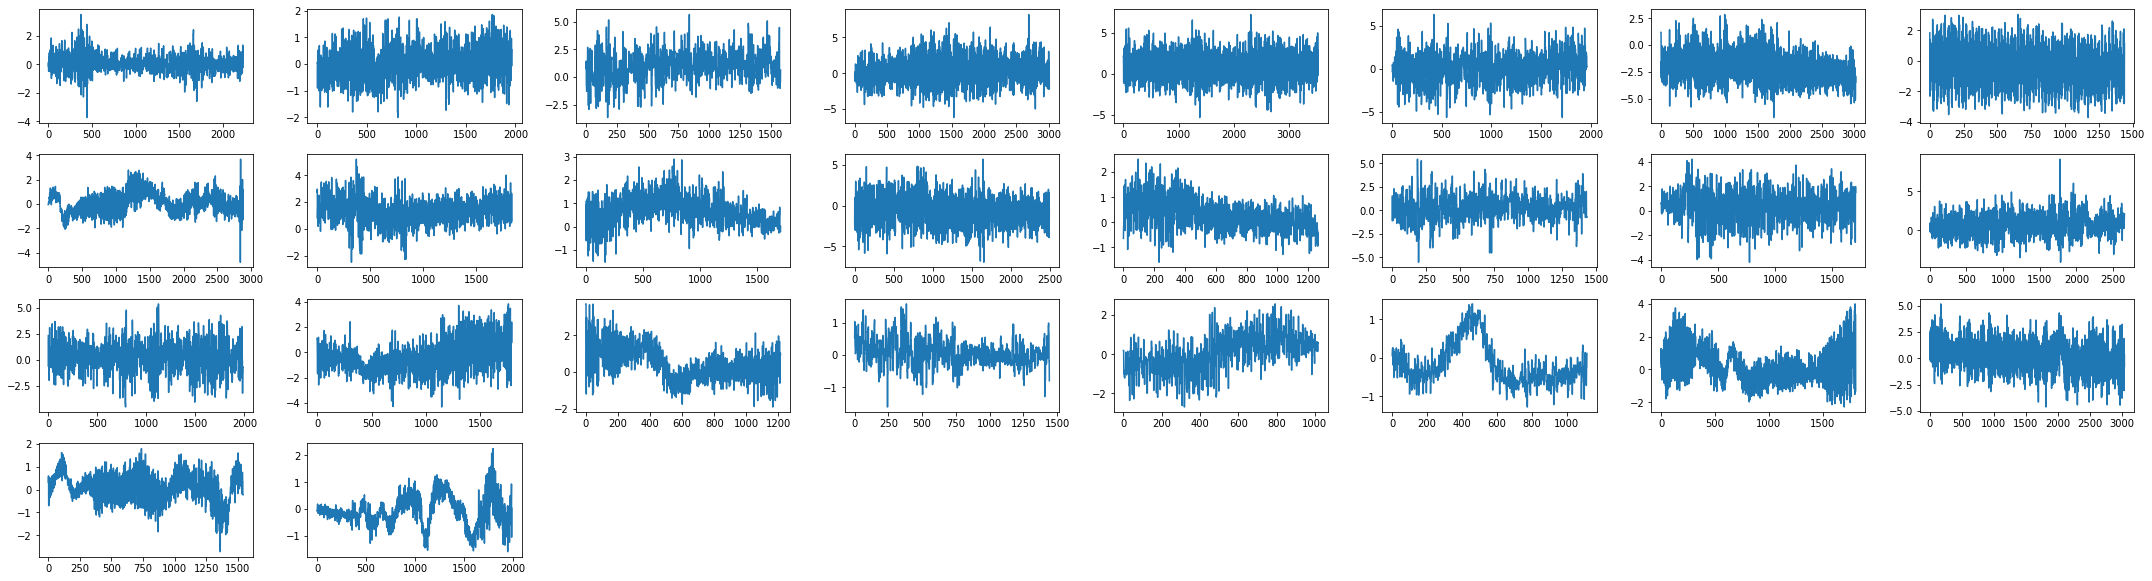

In [9]:
# Plot 12, 10, 4 = 26 non-aggressive events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==0:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

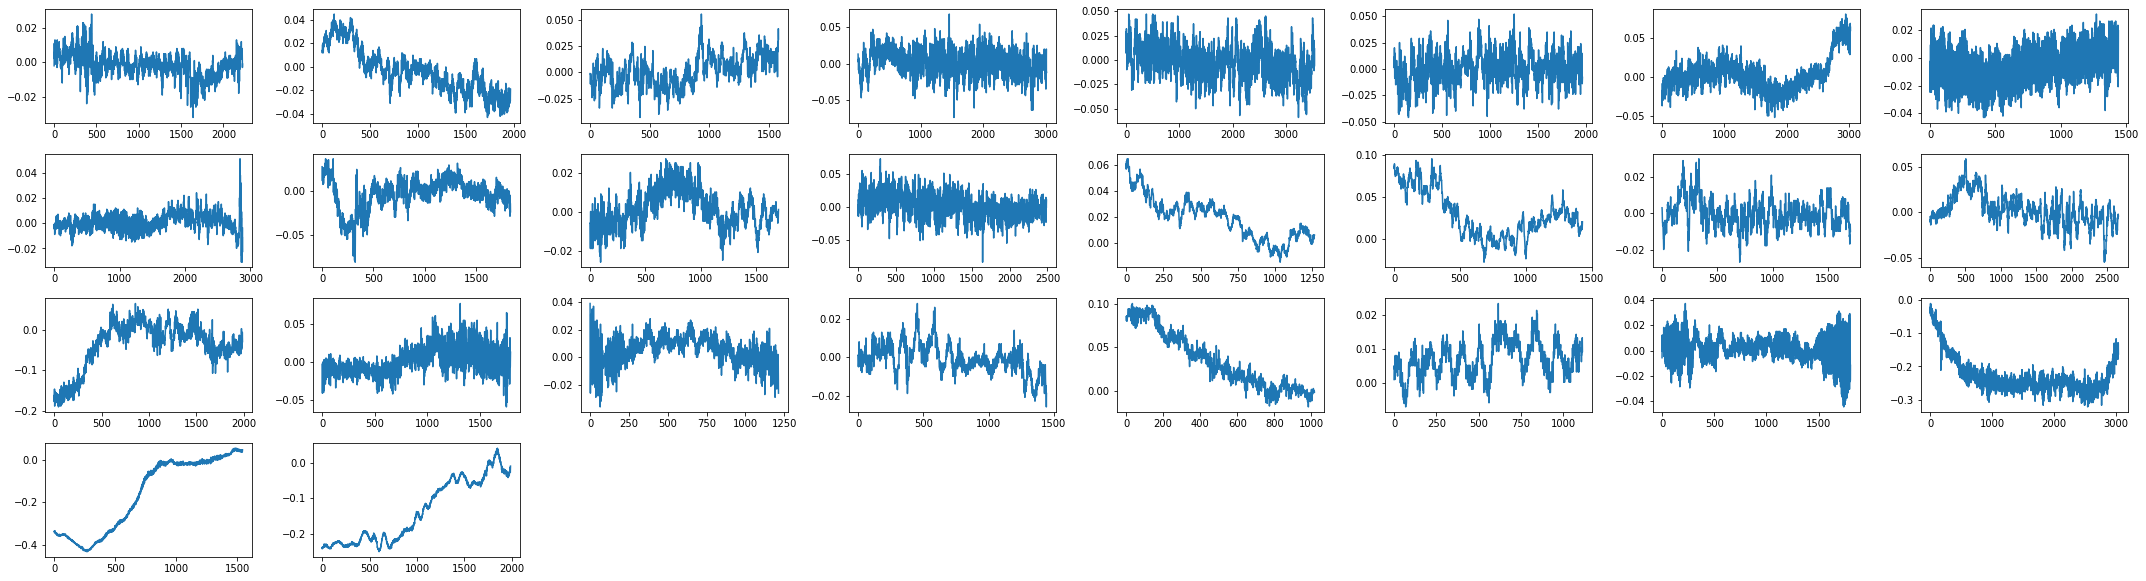

In [10]:
# Plot 12, 10, 4 = 26 non-aggressive events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==0:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive right-turn events

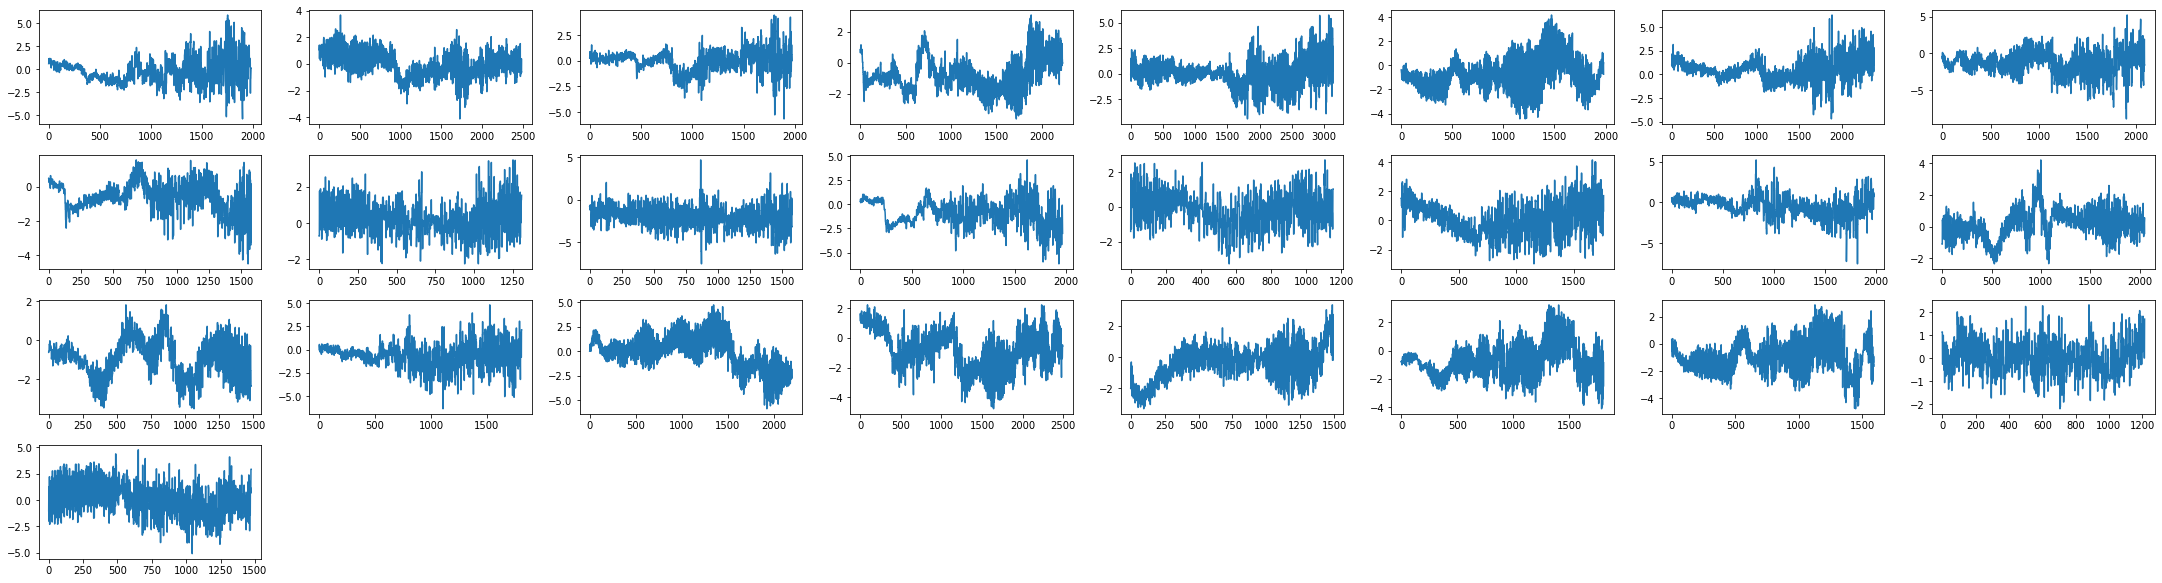

In [11]:
# Plot 11, 8, 6 = 25 aggressive right-turn events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==1:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

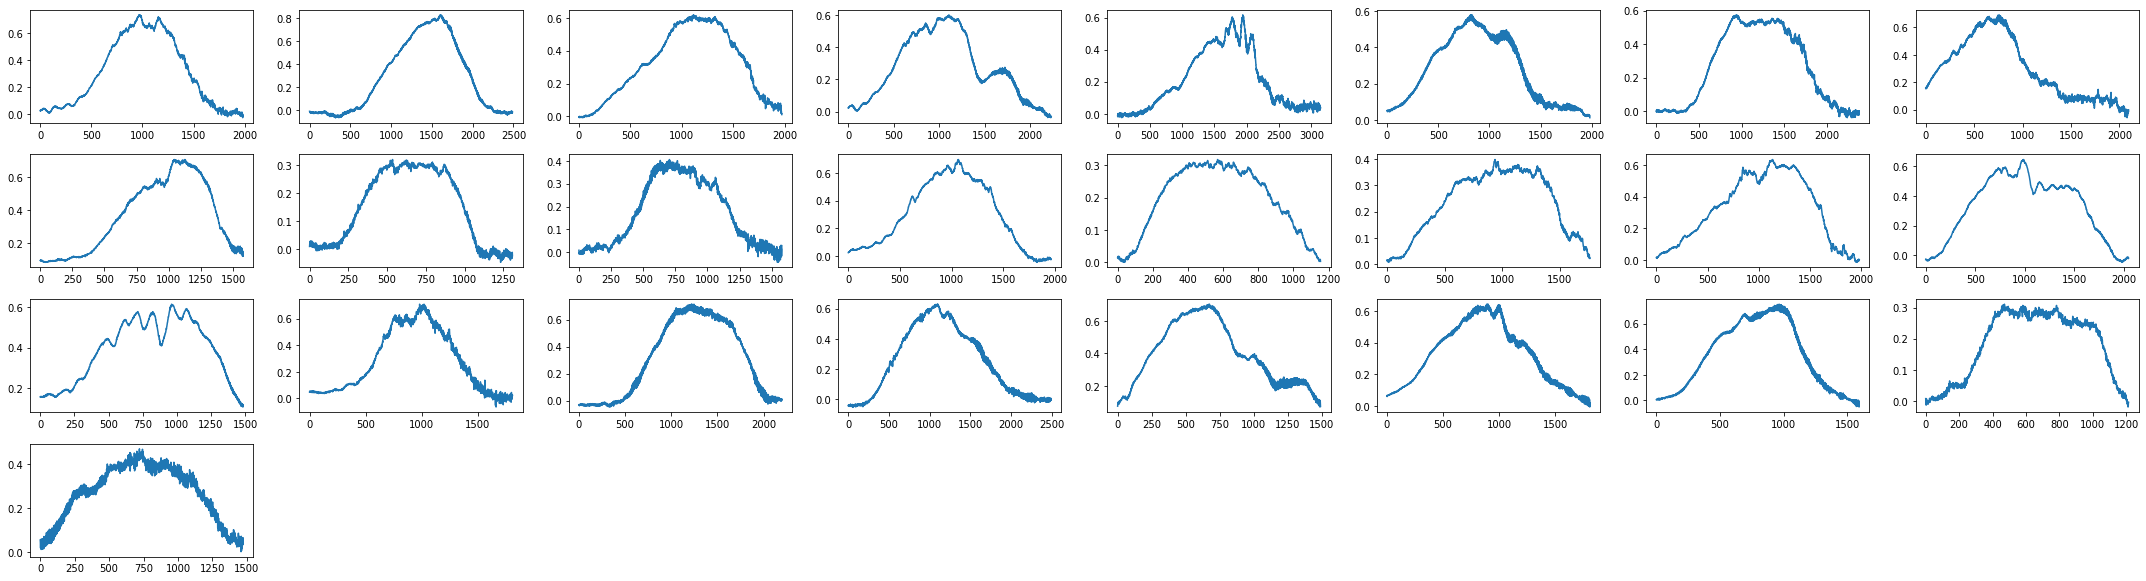

In [12]:
# Plot 11, 8, 6 = 25 aggressive right-turn events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==1:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive left-turn events

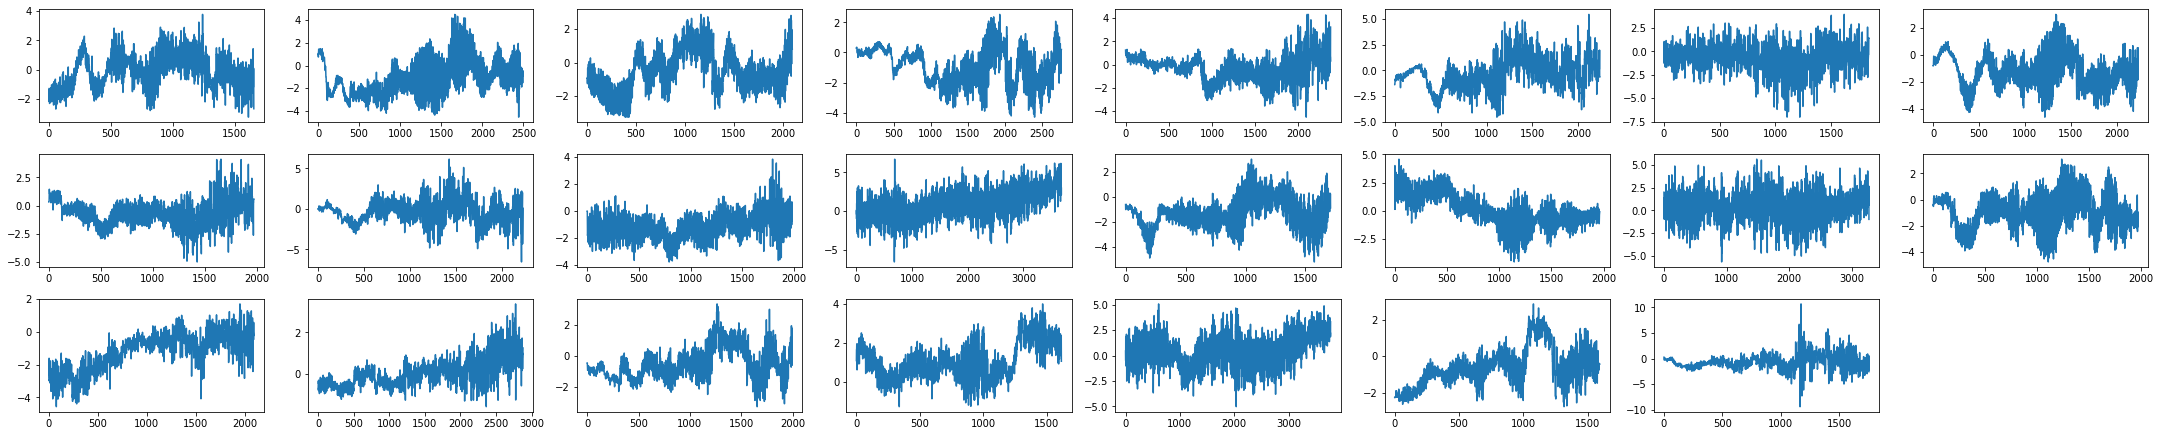

In [13]:
#18, 5, 0 = 23 aggressive left-turn events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==2:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

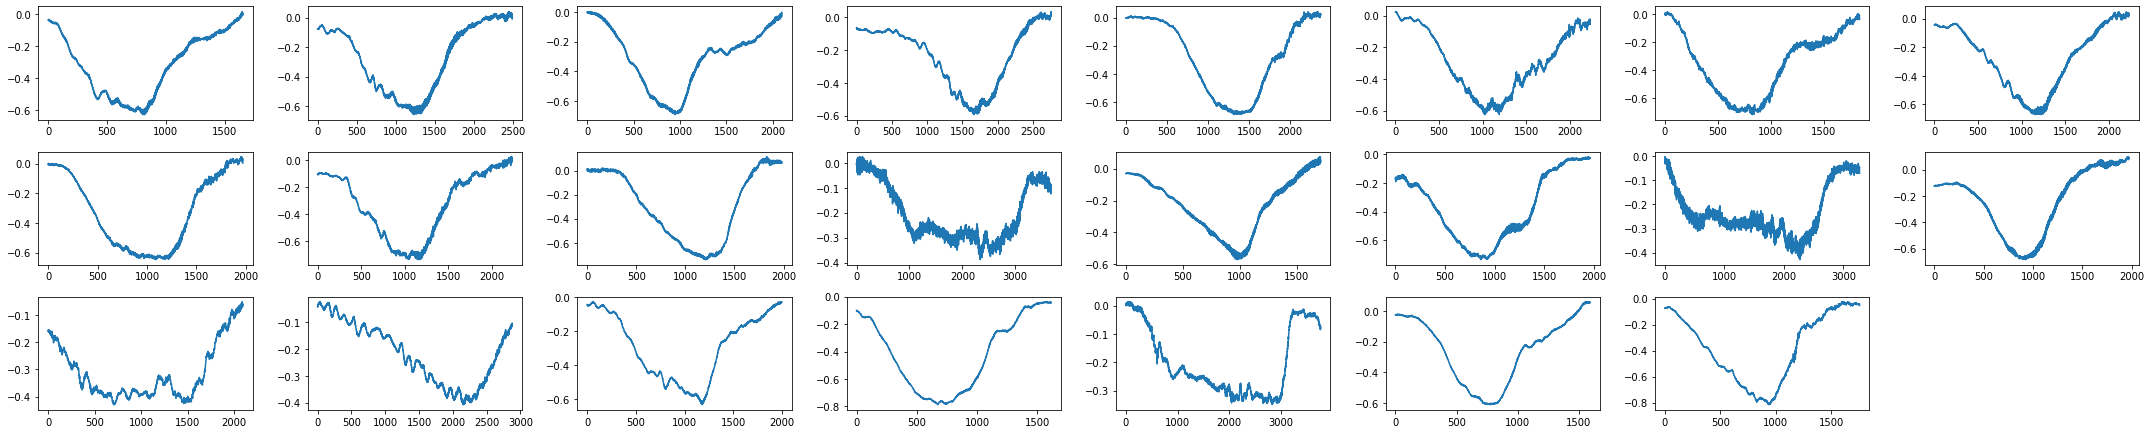

In [14]:
#18, 5, 0 = 23 aggressive left-turn events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==2:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive lane change events

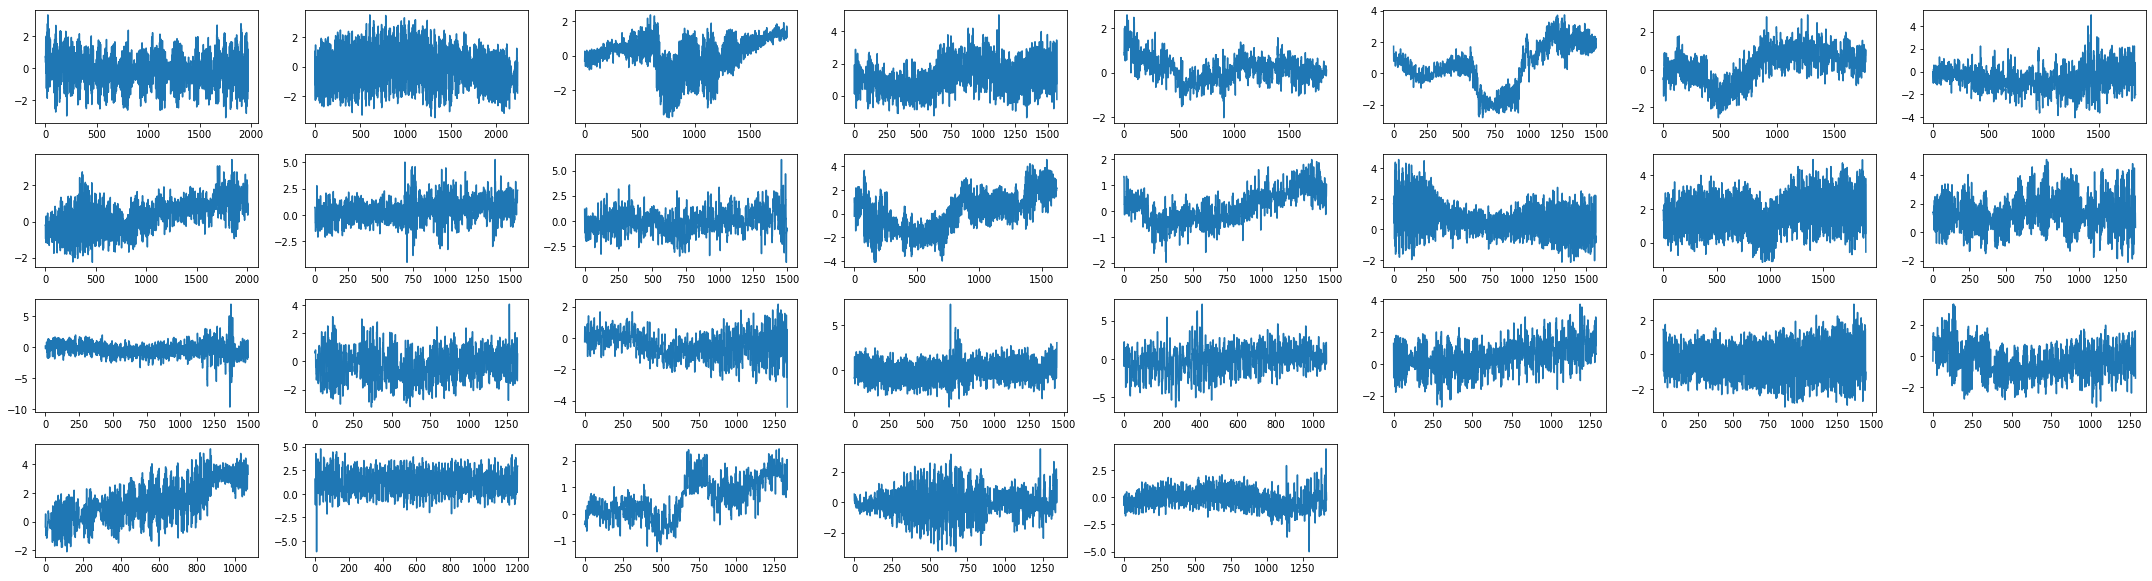

In [15]:
#5, 6, 18 = 29 aggressive lane change events to the right - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==3:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

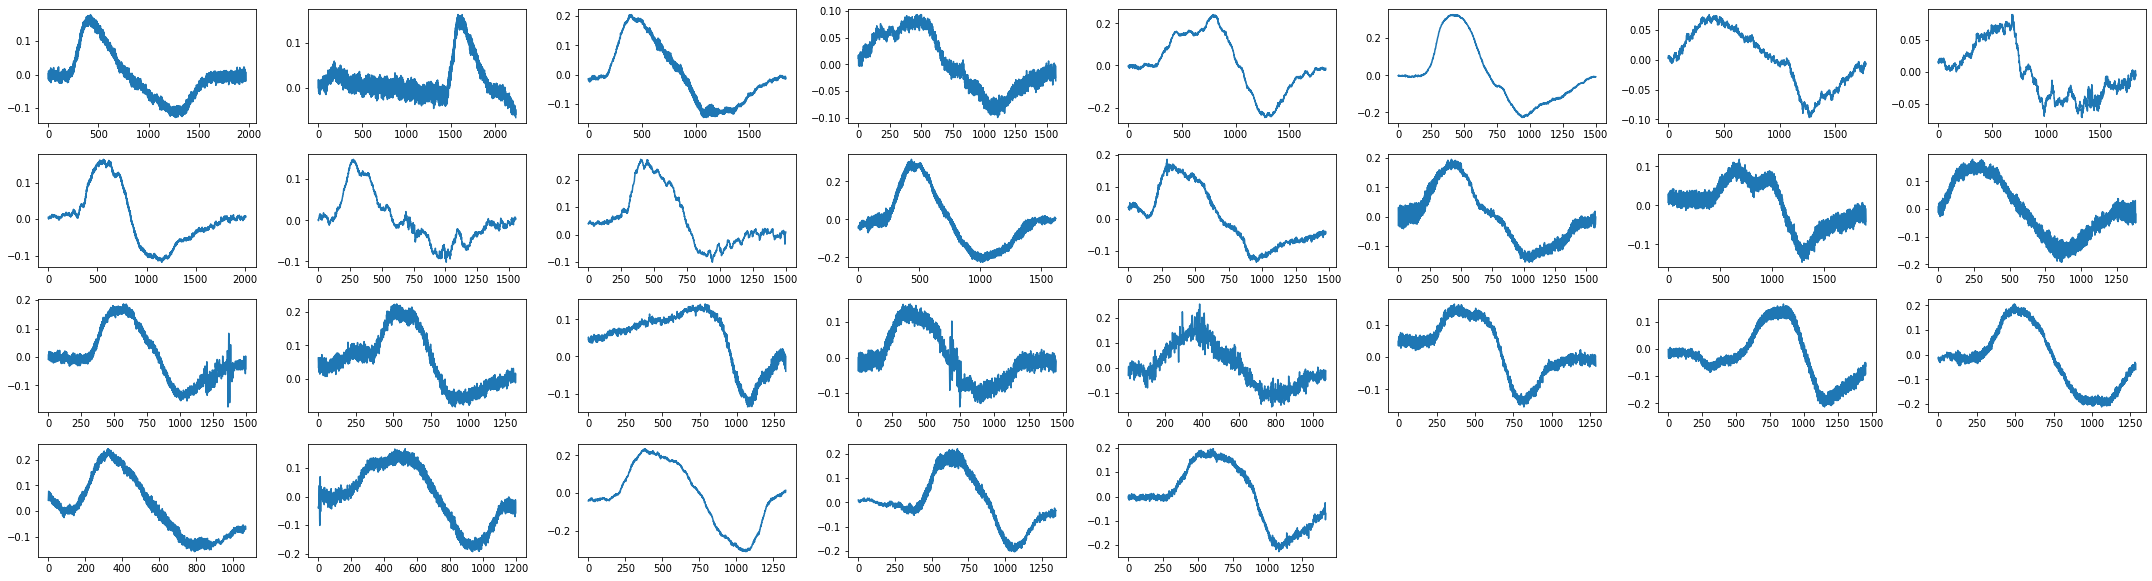

In [16]:
#5, 6, 18 = 29 aggressive lane change events to the right - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==3:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive braking events

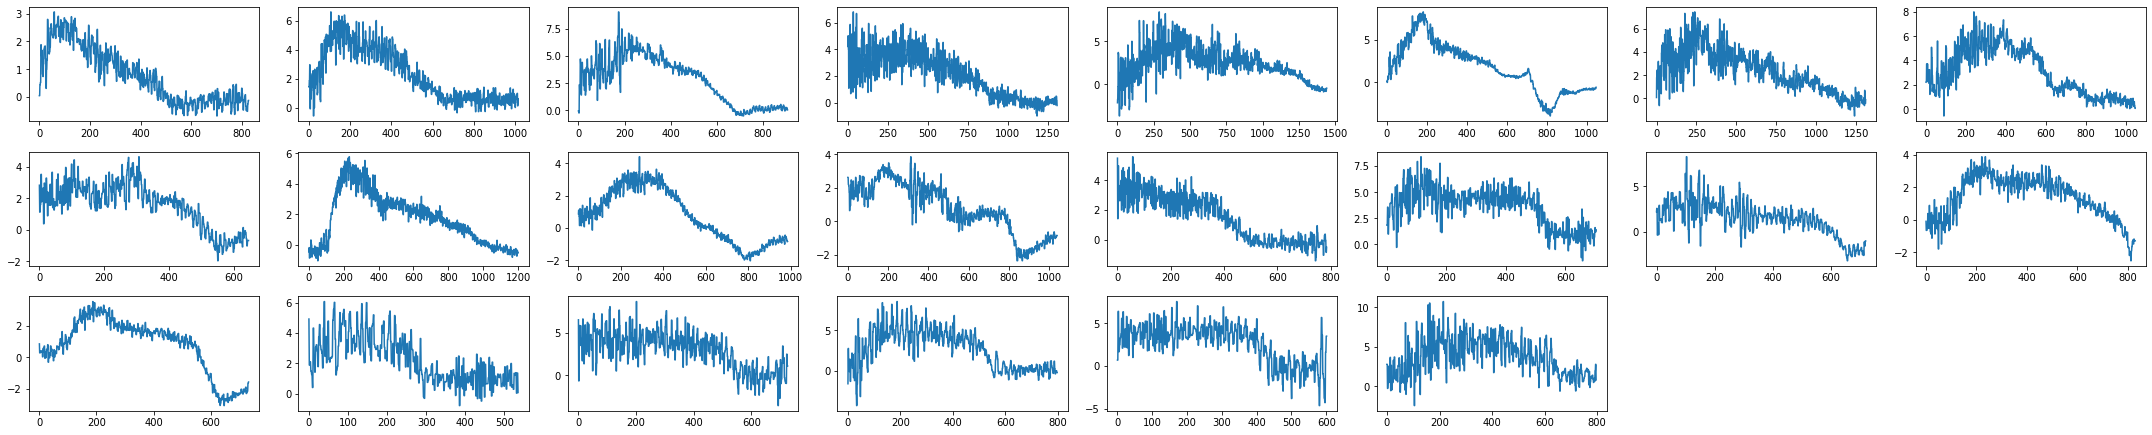

In [17]:
#15, 7, 0 = 22 aggressive braking events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==4:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

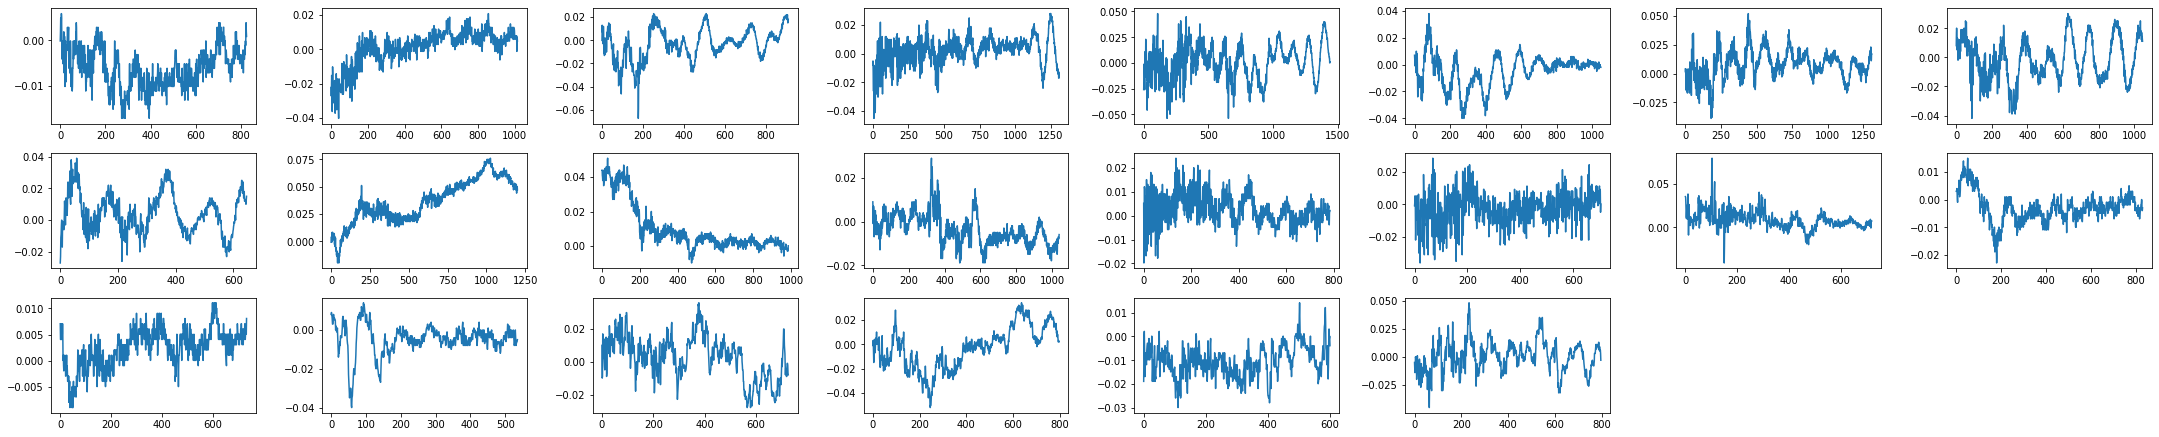

In [18]:
#15, 7, 0 = 22 aggressive braking events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==4:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive acceleration events

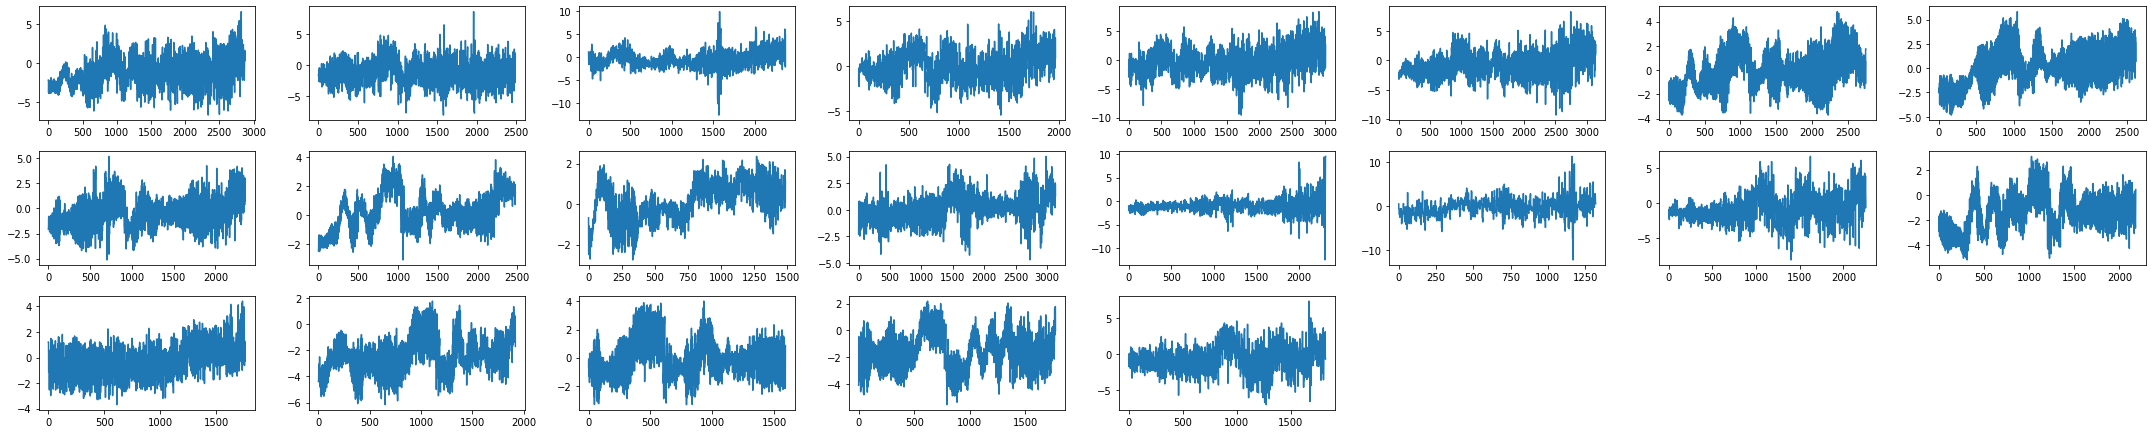

In [19]:
#9, 6, 6 = 21 aggressive acceleration events - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==5:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

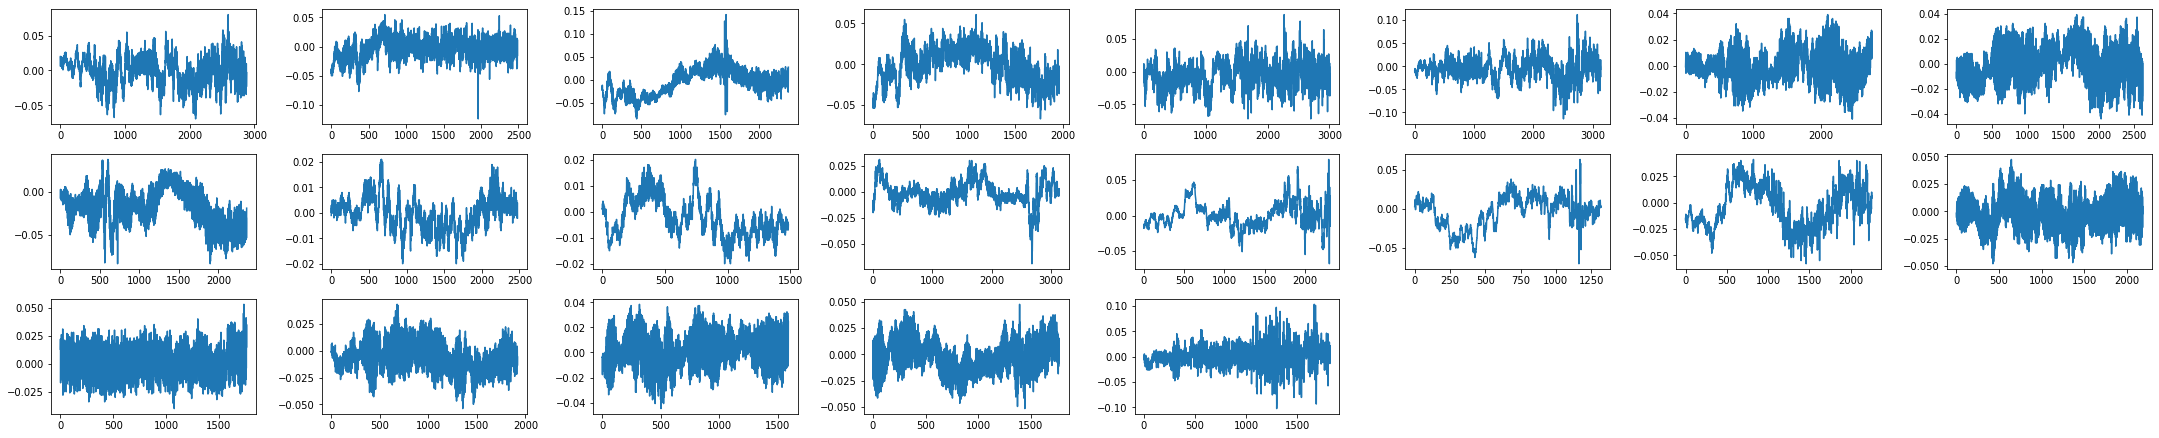

In [20]:
#9, 6, 6 = 21 aggressive acceleration events - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==5:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()

### Aggressive lane change events to the left

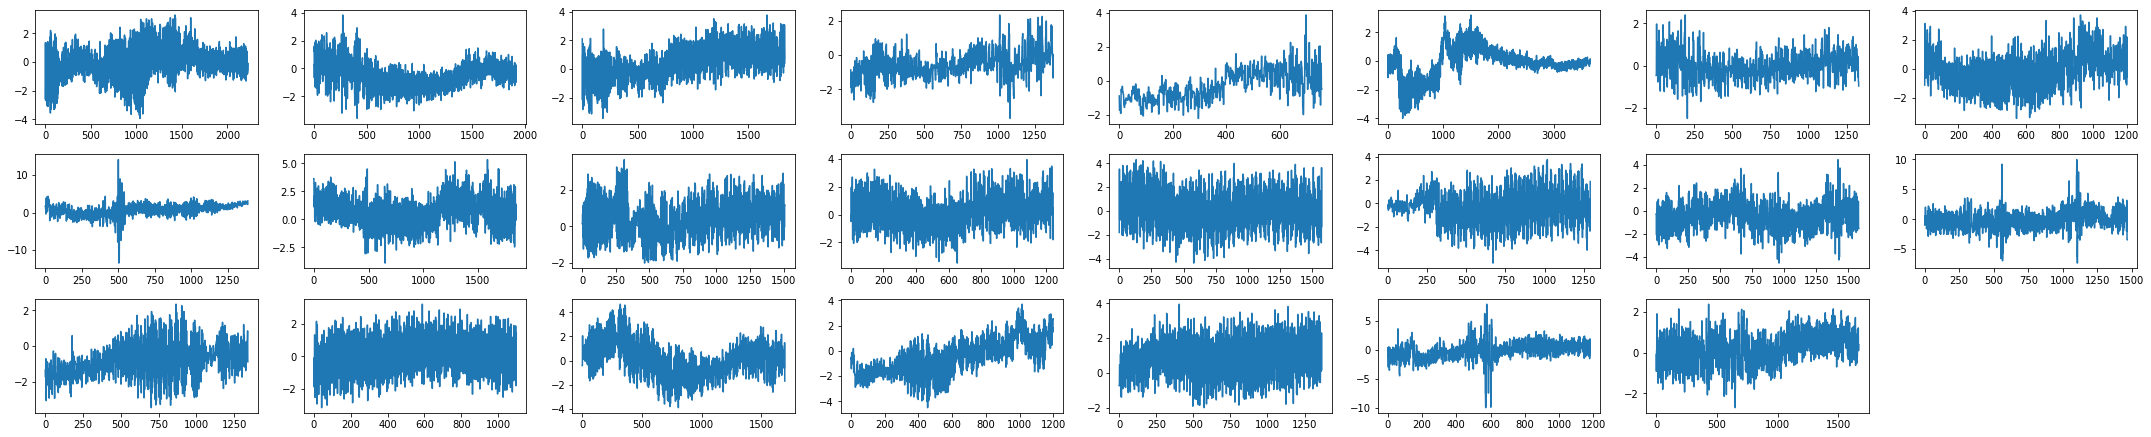

In [21]:
#3, 4, 6 = 23 aggressive lane change events to the left - Linear Acceleration
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==6:
        ax = fig.add_subplot(gs[j])
        ax.plot(accel_y[n])
        j = j + 1
fig.tight_layout()

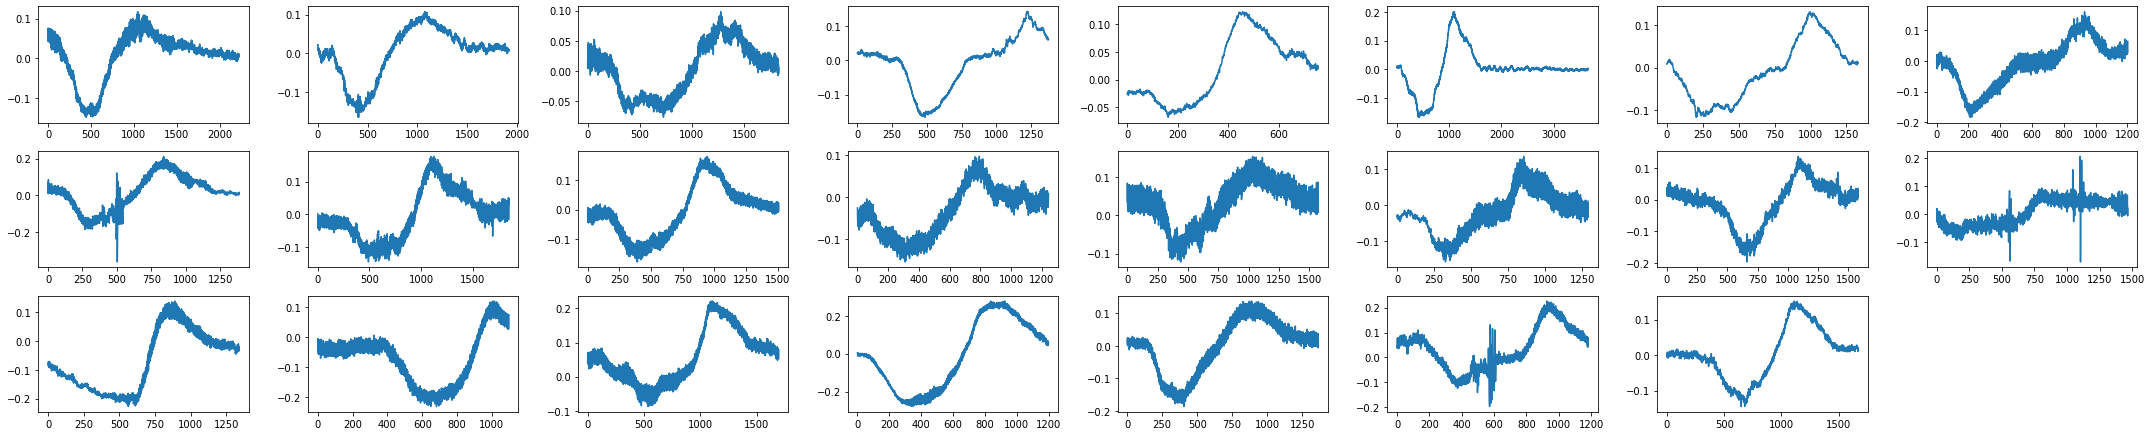

In [22]:
#3, 4, 6 = 23 aggressive lane change events to the left - Angular Velocity
gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(30,20))
j = 0
for n in range(len(accel_y)):
    if data_target[n]==6:
        ax = fig.add_subplot(gs[j])
        ax.plot(giro_z[n])
        j = j + 1
fig.tight_layout()